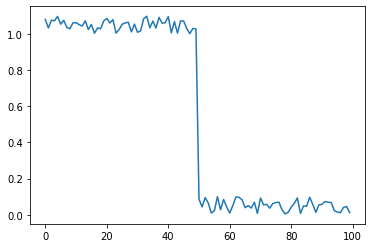

0.8288788440590275

In [11]:
import numpy as np 
import matplotlib.pyplot as plt # type: ignore 

arr_1d = np.zeros((100))

for k in np.arange(50):
    arr_1d[k]=1

arr_1d += 0.1 * np.random.random((100))

plt.plot(np.arange(100), arr_1d[:])
plt.show()

def get_Pi(arr_1d): 
    N=len(arr_1d)
    Pi=0
    arr_1d/=np.max(arr_1d)
    distance=np.empty(N-1)
    for j in np.arange(N-1):
        distance[j]=np.abs(arr_1d[j]-arr_1d[j+1])
    M=np.max(distance)
    A=(np.sum(distance)-M) / (N-2) 
     
    return M-A        
       
get_Pi(arr_1d)

In [1]:
from pqcprep.psi_tools import psi_linear 

psi_linear(2)

0.94

In [5]:
test = {} 
test["seed"] = 10 
test["t"]="e"
print(test)
test["seed"] =5
f"({str(test['seed'])})"

{'seed': 10, 't': 'e'}


'(5)'

In [24]:
x= 5

x=4 if 0==1 else x

print(x)

5


In [6]:
from qiskit import QuantumCircuit 

qc= QuantumCircuit(2)

qc.num_qubits

arr = [1,1,3,4]

arr[0:len(arr)]

[1, 1, 3, 4]

In [102]:
import numpy as np
import matplotlib.pyplot as plt 

def remove_outliers(arr, step: int, sig_mult: float, verbose: bool=True, visualise: bool=True):
    """
    Remove outliers from an array `arr` by removing local minima/maxima for 
    regions (as defined by `step`) with a local standard deviation greater than 
    `sig_mul` times the (reduced) average local standard deviation. 

    """
    arr_smoothed=np.copy(arr)
    n = len(arr) // step

    sigma_arr = np.empty(len(arr))
    
    idx =0 
    for i in np.arange(n):

        s=len(arr)-idx if i==n-1 else step  
        sigma_arr[idx:idx+s]=np.std(arr[idx:idx+s]) * np.ones(len(arr[idx:idx+s]))
        idx +=s

    ind=0
    count=0 
    for j in np.arange(len(arr)):
       
       jr = ind // step
       s=len(arr)-jr if jr==n-1 else step   
       
       if sigma_arr[j] >= sig_mult* (np.sum(sigma_arr)-np.sum(sigma_arr[ind:ind+s]))/(len(sigma_arr)-s):
            local_arr=arr[ind:ind+s]

            x=0 
            outlier_ind=0
            for k in np.arange(s):
                if np.std(np.delete(local_arr,k)) > x:
                    x=np.std(np.delete(local_arr,k)) 
                    outlier_ind=k
                    
            if arr[j]==local_arr[outlier_ind]:
                arr_smoothed[j]=arr[j-1] if j != 0 else arr[j+1]
                count += 1
            
       if j ==s + ind-1:
        ind += s

    if verbose:
        print(f"Found and removed {count} outliers.")

    if visualise:
        plt.figure(figsize=(10,10))
        plt.plot(np.arange(len(arr)), arr, label="original", color="black")
        plt.plot(np.arange(len(arr)), arr_smoothed, label="smoothed", color="red")
        plt.legend()
        plt.show()
            
    return arr_smoothed         

a =np.arange(10)

a[2]= 400000

remove_outliers(a, 3, 5, True )       

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 36)